# Analog circuit simulation using NgSpice in Python Jupyter

By Shuo Chen (chenshuo_at_chenshuo.com)

Latest notebook: https://github.com/chenshuo/notes/blob/master/notebooks/AnalogCircuits.ipynb

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# NgSpice
import ngspyce as ng

ERROR:ngspyce.sharedspice:Note: can't find the initialization file spinit.


In [3]:
# Circuitikz
# pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

%load_ext tikzmagic

In [4]:
def para(r1, r2):
    return (r1*r2) / (r1 + r2)

In [5]:
ng.circ('''
  V1 vcc 0 15
  R1 vcc b 47k
  R2 b 0 4k
''')
ng.operating_point()

{'v1#branch': array([-0.00029412]),
 'b': array([1.17647059]),
 'vcc': array([15.])}

In [6]:
print(ng.vector_names())

['v1#branch', 'b', 'vcc']


In [7]:
print(ng.vectors())

{'v1#branch': array([-0.00029412]), 'b': array([1.17647059]), 'vcc': array([15.])}


In [8]:
Vb = ng.vector('b')
print(Vb)

[1.17647059]


In [9]:
Vcc = 15
Vbb = 4 / (4 + 47) * Vcc
print(Vbb)

1.1764705882352942


In [10]:
print(Vbb - Vb[0])

-2.220446049250313e-16


# Setting Q-point of basic CE amplifier 

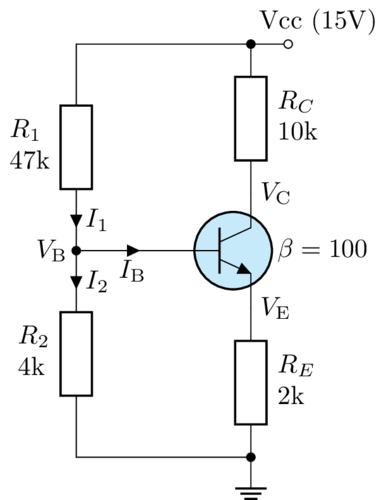

In [24]:
%%tikz -p circuitikz -s 400,500
\ctikzset{european resistors, transistors/arrow pos=end, transistors/fill=cyan!20}
\newcommand{\ui}[1]{\ensuremath{I_\mathrm{#1}}}
\newcommand{\uv}[1]{\ensuremath{V_\mathrm{#1}}}
\draw (0, 0) node [npn, tr circle] (Q) {$\beta=100$};
\draw (Q.C) to [R, l2_={$R_C$ and 10k}] ++(0, 2) coordinate (Vcc)
  to [short, -o] ++(0.5, 0) ++(0.4, 0) node [above] {Vcc (15V)}; 
\draw (Q.B) to [short, -*, i<={$\ui{B}$}] ++ (-1.5, 0) coordinate (B);
\draw (Q.E) node [right] {$\uv{E}$}
to [R, l2={$R_E$ and 2k}, -*] ++(0, -2) coordinate (G) node[ground]{};
\draw (B) to [R, l2={$R_1$ and 47k}, i<_={$I_1$}] (B|-Vcc) to [short, -*] (Vcc);
\draw (B) to [R, l2_={$R_2$ and 4k}, i>^={$I_2$}] (B|-G) to [short] (G);
%\draw (B) to [C, -o] ++(-1.5, 0) node [left] {Vin};
\draw (Q.C) node [right] {$\uv{C}$} ; %to [short, *-o] ++(0.7, 0) node[above] (O) {Vout};
\draw (B) node [left] {$\uv{B}$};

Thevenin's theorem

In [11]:
Rb = para(4, 47)
print(Rb)

3.6862745098039214


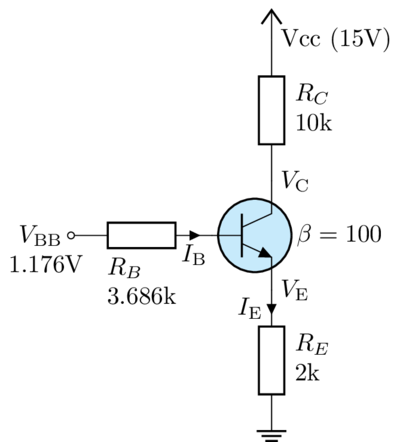

In [42]:
%%tikz -p circuitikz -s 400,500
\ctikzset{european resistors, transistors/arrow pos=end, transistors/fill=cyan!20}
\newcommand{\ui}[1]{\ensuremath{I_\mathrm{#1}}}
\newcommand{\uv}[1]{\ensuremath{V_\mathrm{#1}}}
\draw (0, 0) node [npn, tr circle] (Q) {$\beta=100$};
\draw (Q.C) to [R, l2_={$R_C$ and 10k}, bipoles/length=1.2cm] ++(0, 2) coordinate (Vcc)
  node [vcc] {} node [right] {Vcc (15V)}; 
\draw (Q.B) to [R, -o, i<={$\ui{B}$}, bipoles/length=1.2cm,l2={$R_B$ and 3.686k}] ++ (-2, 0) coordinate (B);
\draw (Q.E) node [right] {$\uv{E}$}
to [R, l2={$R_E$ and 2k}, i>_={\ui{E}}, bipoles/length=1.2cm] ++(0, -2) coordinate (G) node[tlground]{};
\draw (Q.C) node [right] {$\uv{C}$} ;
\draw (B) node [left] {$\uv{BB}$};
\draw (B)++(0.3, -0.4) node [left] {1.176V};

$I_B \cdot R_B + V_{BE} + I_E \cdot R_E = V_{BB}$

$I_E = (1+\beta)I_B$

$I_B \cdot R_B + (1+\beta)I_B \cdot R_E = V_{BB} - V_{BE}$

In [12]:
Vbe = 0.7
beta = 100
Re = 2

Ib = (Vbb - Vbe) / (Rb  + (1+beta) * Re)
print('Ib = %.3f μA' % (Ib * 1e3))

Ib = 2.316 μA


In [13]:
Vcc = 15
Rc = 10

Vc = Vcc - Rc * beta * Ib
print('Vc = %.2f V' % Vc)

Vc = 12.68 V


$I_B = I_E/(1+\beta)$

$I_E/(1+\beta)\cdot R_B + I_E \cdot R_E = V_{BB} - V_{BE}$

In [14]:
Ie = (Vbb - Vbe) / (Rb/(1+beta) + Re)
print('Ie = %.4f mA' % (Ie))
Ic = beta / (1+beta) * Ie
print('Ic = %.4f mA' % (Ic))

Ie = 0.2340 mA
Ic = 0.2316 mA


In [15]:
Vc = Vcc - Rc * Ic
print('Vc = %.2f V' % Vc)

Vc = 12.68 V


## Operating point

In [16]:
ng.circ('''
  V1 vcc 0 15
  R1 vcc b 47k
  R2 b 0 4k
  Q1 c b e npn
  Rc vcc c 10k
  Re e 0 2k
  .model npn npn(BF=100)
  .options savecurrents
''')
ng.operating_point()

{'@re[i]': array([0.00021704]),
 '@rc[i]': array([0.0002149]),
 '@q1[is]': array([1.28510456e-11]),
 '@q1[ib]': array([2.14894329e-06]),
 '@q1[ie]': array([-0.00021704]),
 '@q1[ic]': array([0.0002149]),
 '@r2[i]': array([0.00029214]),
 '@r1[i]': array([0.00029429]),
 'v1#branch': array([-0.00050918]),
 'e': array([0.43408875]),
 'c': array([12.85104557]),
 'b': array([1.16854899]),
 'vcc': array([15.])}

In [17]:
Vb = ng.vector('b')
Ve = ng.vector('e')
Ib = ng.vector('@q1[ib]')
Ic = ng.vector('@q1[ic]')
print('Vbe = %.3f V' % (Vb - Ve))
print('Ib = %.3f μA' % (Ib * 1e6))
print('beta = %.0f' % (Ic / Ib))

Vbe = 0.734 V
Ib = 2.149 μA
beta = 100


## DC sweep

In [18]:
ng.cmd('dc r1 10k 100k 100')
# print(ng.vector_names())
r1 = ng.vector('res-sweep')
Vb = ng.vector('b')
Ve = ng.vector('e')
Vc = ng.vector('c')
Ib = ng.vector('@q1[ib]')
Ic = ng.vector('@q1[ic]')

(1.0, 16.0)

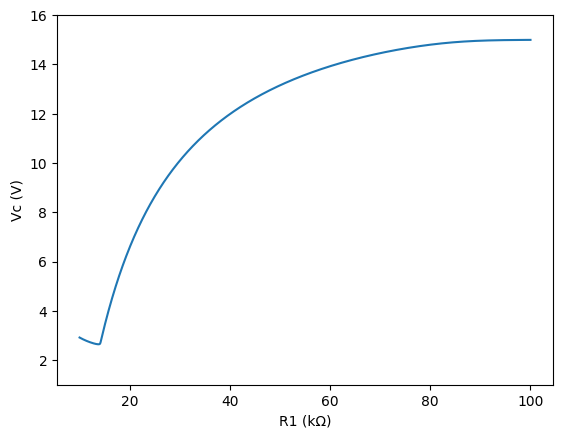

In [19]:
plt.plot(r1/1e3, Vc)
plt.xlabel('R1 (kΩ)')
plt.ylabel('Vc (V)')
plt.ylim(1, 16)

In [20]:
ng.cmd('alter r1 22k')
ng.operating_point()

{'@re[i]': array([0.00075775]),
 '@rc[i]': array([0.00075025]),
 '@q1[is]': array([7.49752406e-12]),
 '@q1[ib]': array([7.50285045e-06]),
 '@q1[ie]': array([-0.00075779]),
 '@q1[ic]': array([0.00075029]),
 '@r2[i]': array([0.00057057]),
 '@r1[i]': array([0.00057808]),
 'v1#branch': array([-0.00132832]),
 'e': array([1.51550012]),
 'c': array([7.49752406]),
 'b': array([2.28229933]),
 'vcc': array([15.])}

## Temperature sweep

Text(0, 0.5, 'Ic (mA)')

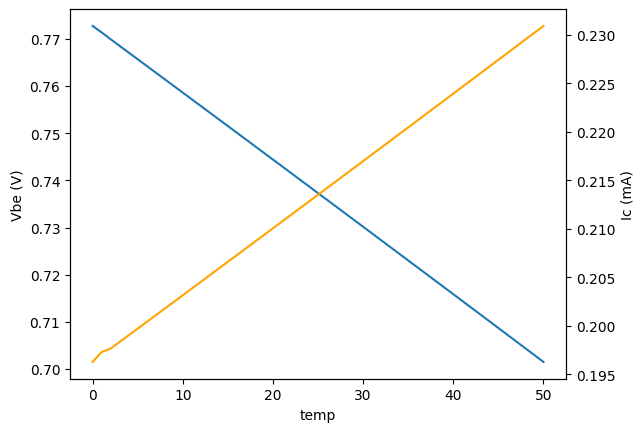

In [49]:
ng.cmd('dc temp 0 50 1')
temp = ng.vector('temp-sweep')
Ic = ng.vector('@q1[ic]')
Vb = ng.vector('b')
Ve = ng.vector('e')
fig, ax = plt.subplots()
plt.plot(temp, Vb-Ve, label='Vbe')
plt.xlabel('temp')
plt.ylabel('Vbe (V)')
ax2 = ax.twinx()
plt.plot(temp, Ic*1e3, 'orange', label='Icq')
plt.ylabel('Ic (mA)')

Robert Widlar, An exact expression for the thermal variation of the emitter base voltage of bi-polar transistors.
Proceedings of the IEEE ( Volume: 55, Issue: 1, January 1967)

In [53]:
# Linear regression

Vbe = Vb - Ve
print(Vbe[0])
m, b = np.polyfit(temp, Vbe, 1)
print(m, b)
t = -273
print(m*t + b)

0.7727645132021105
-0.0014251114229438106 0.7728809479739165
1.1619363664375768
